In [2]:
%gui qt5

Wait for a few sec

## Notebook use to analyse data.¶

You can click shift + enter to run one cell, you can also click run in top menu. To run all the cells, you can click `kernel` and `Restart` and `run all` in the top menu.


In [3]:
# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [4]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

## The following path should direct to the folder "utils", on Window env it should have slash " / " and not backslash " \ " .

In [5]:
# Create a temporary python PATH to the module that we are using for the analysis
import sys
sys.path.insert(0, "/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2019/haodi/HaodiAnalysis/utils")

In [6]:
from sarcomeres_analysis import *

In [7]:
import napari

In [8]:
import javabridge
import bioformats

In [9]:
#%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [10]:
# Need to create a javabridge to use bioformats to open proprietary format
javabridge.start_vm(class_path=bioformats.JARS)

### In the `data` variable you should enter the path to your data:

In [11]:
data = "/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2019/haodi/data/Example_1.nd2"

In [12]:
img, meta, directory = load_data.load_data(data)

# Remove background

In [13]:
img_back_sub = process.hdome(img)

In [14]:
#plot.plot_int_under_line(img, img_back_sub);

### Careful to not draw outside the frame

In [15]:
viewer = napari.view_image(img_back_sub)

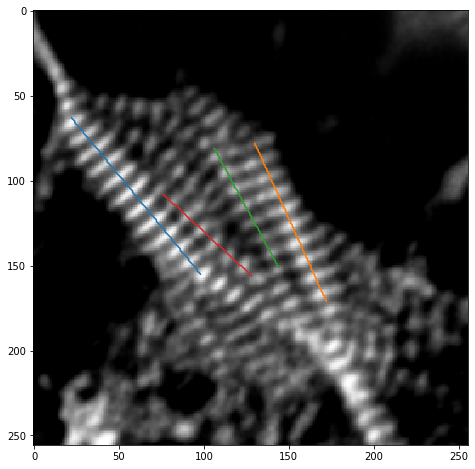

In [16]:
lines = plot.draw_lines_napari(viewer, img_back_sub)

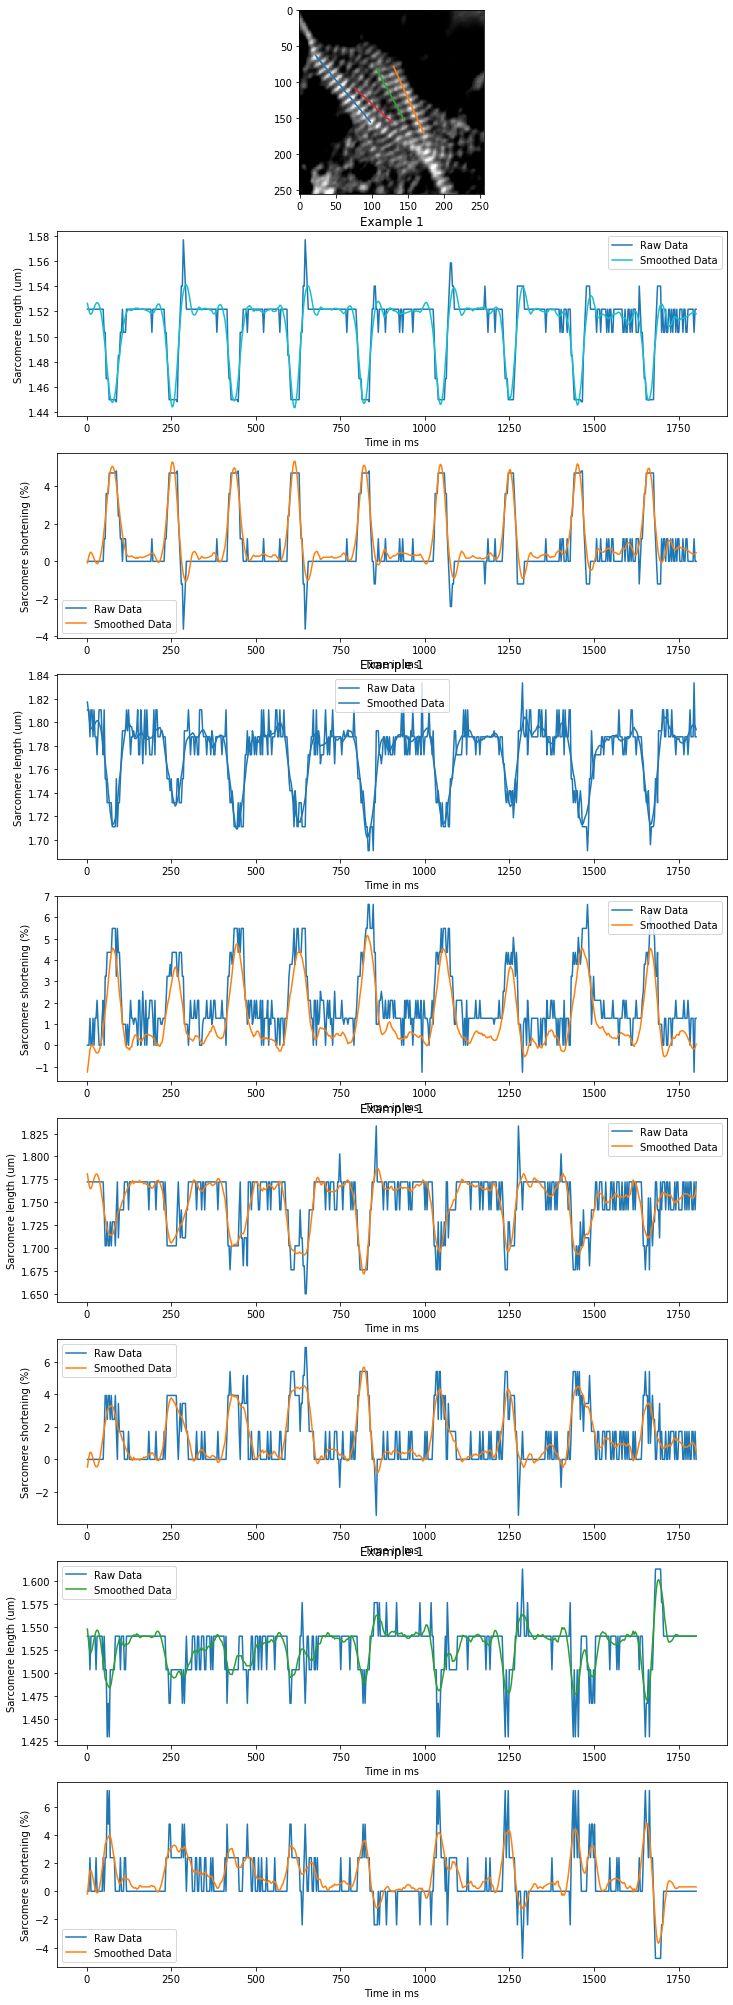

In [57]:
results = analyses.dist_sarco(img_back_sub, meta, lines, directory, plot=True, save = True)

# Extract distance between sarcomere and save data

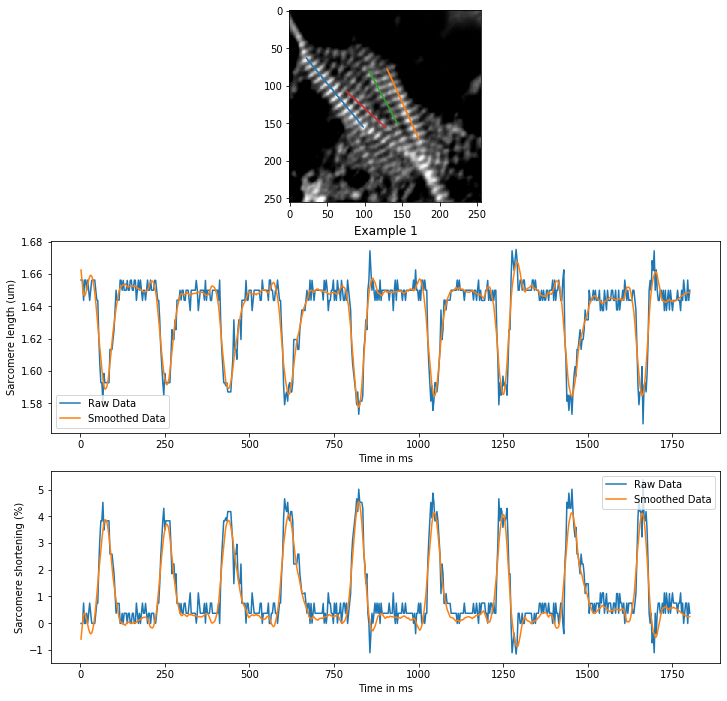

In [30]:
result = analyses.av_dist_sarco(img_back_sub, meta, lines, directory, plot=True, save = True)

# Analyse the plot

In [59]:
# per line
for i, result in enumerate(results):
    analyses.to_dataframe(result, meta, directory, line_num = str(i), save=True)

In [53]:
df = analyses.to_dataframe(result, meta, directory, save=True)

In [50]:
df

,Basal length,Peak length in um,Time to peak in msec,CD90 in msec,CD50 in msec,Max contractile in um/msec,Max relaxation in um/msec,Peak intervals in ms,Beating rate in beat/min
0,1.662551,1.588777,69.072533,69.903890,40.846657,0.030780,-0.021013,0.000000,0.000000
1,1.655674,1.591375,42.044151,64.406740,38.428964,0.023246,-0.019271,183.192371,65.504911
2,1.652653,1.589161,48.050458,83.410403,45.550411,0.024546,-0.017382,183.192371,65.504911
3,1.654895,1.585496,45.047304,86.837043,44.424414,0.024565,-0.017753,177.186064,67.725417
4,1.652835,1.577470,48.050458,63.104273,36.596590,0.025473,-0.029343,207.217600,57.910139
5,1.657040,1.584523,42.044151,69.532524,38.014258,0.024732,-0.023261,222.233368,53.997292
6,1.652179,1.585355,42.044151,56.045255,33.414258,0.026107,-0.031109,204.214446,58.761759
7,1.655756,1.584455,45.047304,80.390480,40.736847,0.025909,-0.020272,204.214446,58.761759
8,1.651943,1.584705,45.047304,55.919693,33.749926,0.024917,-0.031947,207.217600,57.910139
